In [1]:
%cd ..

/root/AIVN-materials/image_analysis


In [91]:
import torch
import matplotlib.pyplot as plt

from knn import KNearestNeighbor
from torchvision import datasets, transforms
from torchvision.transforms import InterpolationMode


In [46]:
mean = torch.tensor([0.5, 0.5, 0.5], dtype=torch.float32) 
std = torch.tensor([0.5, 0.5, 0.5], dtype=torch.float32) 
transform = transforms.Compose([
        transforms.Resize((32, 32), interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean.tolist(), std=std.tolist()),
        transforms.Lambda(lambda x: torch.flatten(x))
])

train_data_path = "/root/splitted_flowers/train"
train_data = datasets.ImageFolder(root=train_data_path, transform=transform)

valid_data_path = "/root/splitted_flowers/valid"
valid_data = datasets.ImageFolder(root=valid_data_path, transform=transform)

In [68]:
nn = KNearestNeighbor()
nn.train(train_data)

In [77]:
X_val = []
y_val = []
for i in range(len(valid_data)):
    X, y = train_data[i]
    X_val.append(X)
    y_val.append(y)
X_val = torch.stack(X_val, dim=0)
y_val = torch.tensor(y_val, dtype=torch.int8)

In [81]:
from torchmetrics import Accuracy

metric = Accuracy()

In [88]:
k_choices = [5, 10, 15, 20, 25, 30, 35]
accs = []
for k in k_choices:
    y_pred = nn.predict(X_val, k=k)
    accs.append(metric(y_pred, y_val))

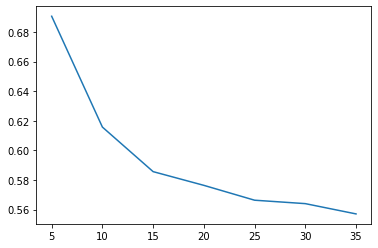

In [92]:
plt.plot(k_choices, accs)

In [86]:
torch.all(y_pred == y_val)

tensor(False)